<div style="text-align: center; background-color: #559cff; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Lab 02 - Introduction To Data Science @ FIT-HCMUS, VNU-HCM 📌
</div>

<div style="text-align: center; background-color: #b1d1ff; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Stage 3.0 - Exploratory data analysis
</div>

## Import

In [1]:
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# YOUR CODE HERE (OPTION) 
# If you need other libraries, you can import them here
import seaborn as sns

In [2]:
plt.style.use('fivethirtyeight')

In [3]:
videos_df = pd.read_csv('../data/processed/df_videos_processed.csv')
videos_df.head()

,video_id,title,published,view_count,like_count,comment_count,duration,definition,tags,default_audio_language,madeforkid,playlist_title,channelTitle,playlist_published,playlist_numvideo
0,H_8ZVRRtiIA,"#1 AI for Good Specialization [Course 1, Week ...",2023-11-17 21:49:15+00:00,1671,34.0,1.0,0 days 00:10:01,hd,NaN,en,False,AI for Good Specialization by DeepLearning.AI,DeepLearningAI,2023-07-20 17:01:28+00:00,37.0
1,bZwkaVnhEo4,"#2 AI for Good Specialization [Course 1, Week ...",2023-07-27 16:54:21+00:00,1299,18.0,1.0,0 days 00:07:12,hd,NaN,en,False,AI for Good Specialization by DeepLearning.AI,DeepLearningAI,2023-07-20 17:01:28+00:00,37.0
2,hkOosfWxBK4,"#3 AI for Good Specialization [Course 1, Week ...",2023-11-17 20:13:19+00:00,584,20.0,2.0,0 days 00:03:47,hd,NaN,en,False,AI for Good Specialization by DeepLearning.AI,DeepLearningAI,2023-07-20 17:01:28+00:00,37.0
3,OIavgUGg7mc,"#4 AI for Good Specialization [Course 1, Week ...",2023-07-27 16:54:56+00:00,619,10.0,0.0,0 days 00:04:49,hd,NaN,en,False,AI for Good Specialization by DeepLearning.AI,DeepLearningAI,2023-07-20 17:01:28+00:00,37.0
4,eZZwySXsj-g,"#5 AI for Good Specialization [Course 1, Week ...",2023-07-27 16:55:12+00:00,579,3.0,0.0,0 days 00:05:36,hd,NaN,en,False,AI for Good Specialization by DeepLearning.AI,DeepLearningAI,2023-07-20 17:01:28+00:00,37.0


In [4]:
comments_df = pd.read_csv('../data/processed/df_comments_processed.csv', lineterminator='\n')
comments_df.head()

,author,Type,video_id,total_reply,like_count,published_at,textdisplay,updatedat
0,@AiexpertRajivVerma,1.0,H_8ZVRRtiIA,0.0,0.0,2023-12-11 01:11:19+00:00,Sir thank you love love 💕❤️❤❤️❤❤❤❤❤❤ you for f...,2023-12-11 01:11:19+00:00
1,@hamasali8764,1.0,bZwkaVnhEo4,0.0,0.0,2023-07-27 16:54:52+00:00,Best One🎉,2023-07-27 16:54:52+00:00
2,@R0H00,1.0,hkOosfWxBK4,0.0,1.0,2023-11-18 02:51:01+00:00,"Hi, I&#39;m a clinician who is working in the ...",2023-11-18 02:51:01+00:00
3,@nitinsnoisepollution6293,1.0,hkOosfWxBK4,0.0,0.0,2023-11-17 20:39:13+00:00,Superb 🎉❤,2023-11-17 20:39:13+00:00
4,@REDBONDYT,1.0,Fxq6vjJwX3o,0.0,1.0,2023-07-30 12:36:13+00:00,Very informative 😃😺,2023-07-30 12:36:13+00:00


In [5]:
# Convert all the dates to datetime objects
def convert_to_datetime(df, columns):
    for col in columns:
        df[col] = pd.to_datetime(df[col])
    return df

videos_df = convert_to_datetime(videos_df, ['published', 'playlist_published'])
comments_df = convert_to_datetime(comments_df, ['published_at', 'updatedat'])

# Overview about all channels

In [14]:
channel_df = pd.DataFrame(columns=['channel_name', 'playlist_count', 'video_count', 'subscriber_count', 'view_count', 'comment_count', 'join_date', 'country', 'link'])

for channel in videos_df.channelTitle.unique():
    name = channel
    temp_df = videos_df[videos_df.channelTitle == channel]
    playlist_count = temp_df.playlist_title.nunique()
    video_count = temp_df.video_id.nunique()
    view_count = temp_df.view_count.sum()
    comment_count = temp_df.comment_count.sum()

    channel_df = channel_df.append({'channel_name': name, 'playlist_count': playlist_count, 'video_count': video_count, 'view_count': view_count, 'comment_count': comment_count}, ignore_index=True)

,channel_name,playlist_count,video_count,subscriber_count,view_count,comment_count,join_date,country,link
0,DeepLearningAI,17,340,NaN,16080674,5640.0,NaN,NaN,NaN
1,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN
2,3Blue1Brown,23,134,NaN,651565174,601441.0,NaN,NaN,NaN
3,Joma Tech,10,70,NaN,166256333,178024.0,NaN,NaN,NaN
4,DataCamp,19,347,NaN,1040476,397.0,NaN,NaN,NaN
5,CS Dojo,9,67,NaN,77386546,83411.0,NaN,NaN,NaN
6,sentdex,42,322,NaN,44789158,55994.0,NaN,NaN,NaN
7,StatQuest with Josh Starmer,16,192,NaN,129733259,185108.0,NaN,NaN,NaN
8,Tech With Tim,45,326,NaN,42199563,44863.0,NaN,NaN,NaN
9,365 Data Science,18,185,NaN,16625868,9318.0,NaN,NaN,NaN


### The timeframe for video publishing

In [42]:
start = videos_df['published'].min().date()
end = videos_df['published'].max().date()
print(f"Videos published between {start} and {end}")

Videos published between 2014-08-06 and 2023-12-22


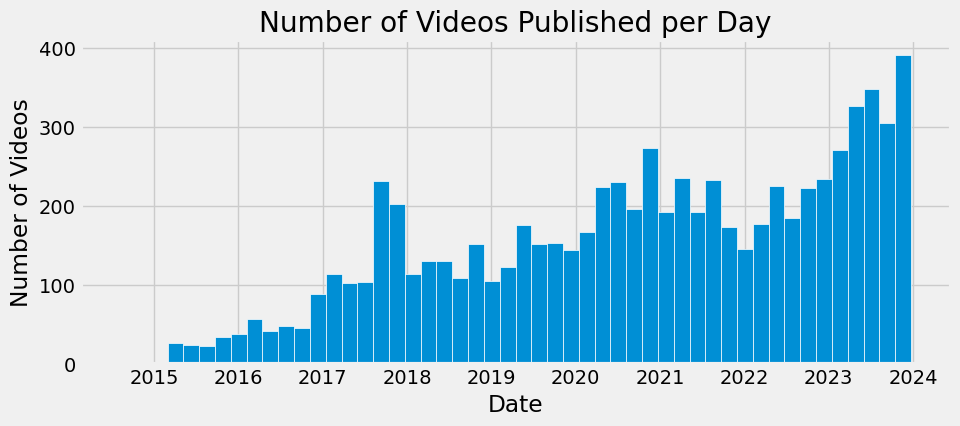

In [43]:
# Histogram of the number of videos published
plt.figure(figsize=(10, 4))
plt.hist(videos_df['published'], bins=50, edgecolor='white')
plt.title('Number of Videos Published per Day')
plt.xlabel('Date')
plt.ylabel('Number of Videos')
plt.show()

There are three main timeframes for video publishing:

- Mid 2017 to 2018
- 2020-2022: This period coincided with the COVID-19 pandemic.
- 2023-now: This is due to the fact that most of the collected channels are relatively new, having been created recently.

### The common time for video publishing

`By month`

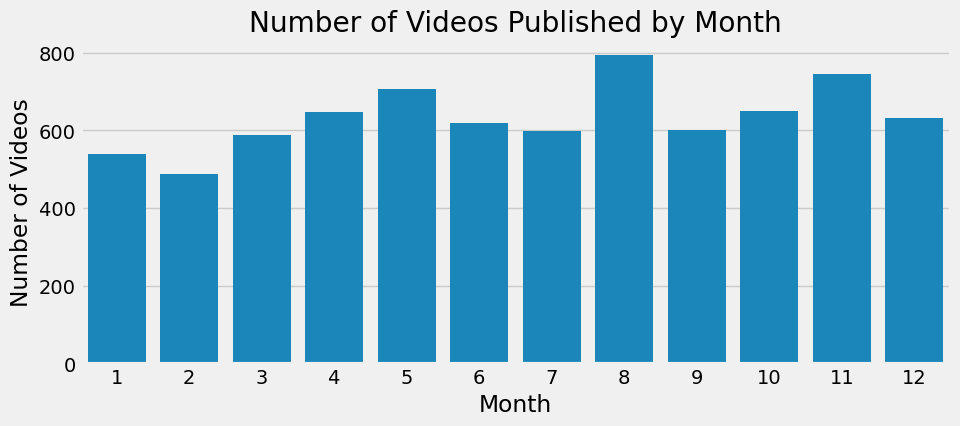

In [44]:
# Number of videos published by month
videos_df['month'] = videos_df['published'].dt.month

plt.figure(figsize=(10, 4))
sns.countplot(x='month', data=videos_df)
plt.title('Number of Videos Published by Month')
plt.xlabel('Month')
plt.ylabel('Number of Videos')
plt.show()

Creators tend to publish videos on May, August, and November. 

`By day of week`

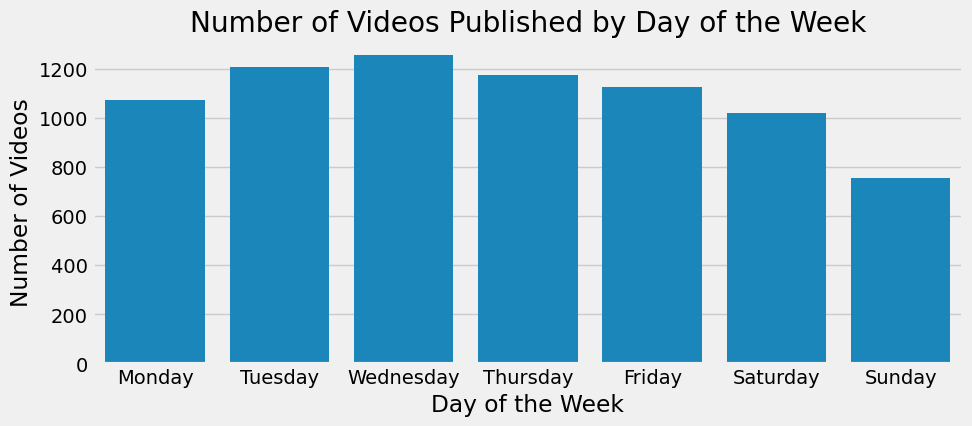

In [45]:
# Number of videos published by day of the week
videos_df['dayofweek'] = videos_df['published'].dt.dayofweek

plt.figure(figsize=(10, 4))
sns.countplot(x='dayofweek', data=videos_df)
plt.title('Number of Videos Published by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Videos')
plt.xticks(np.arange(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.show()


Tuesday, Wednesday, and Thursday are the most common days for video publishing. This may be due to the fact that most of the creators create videos on weekends and publish them on weekdays.

`By hour of the day`

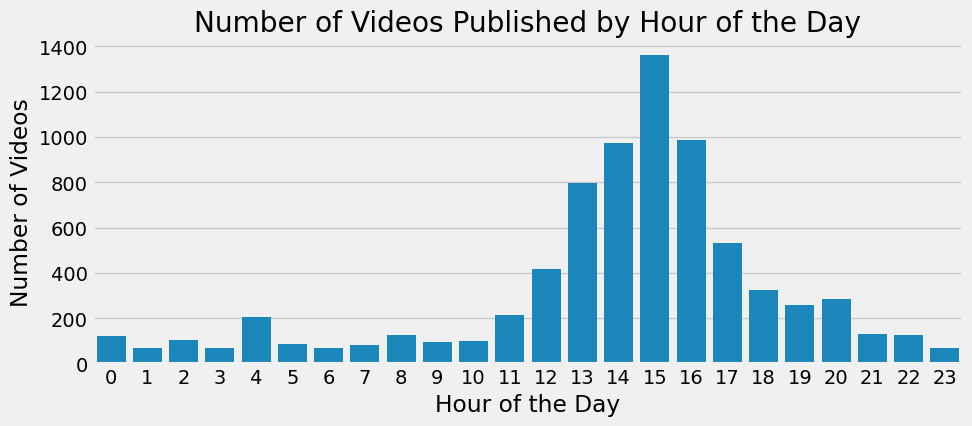

In [46]:
# Number of videos published by hour of the day
videos_df['hour'] = videos_df['published'].dt.hour

plt.figure(figsize=(10, 4))
sns.countplot(x='hour', data=videos_df)
plt.title('Number of Videos Published by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Videos')
plt.show()

The majority of content creators choose to release their videos during the afternoon and evening, with 3 PM emerging as the prevailing time. This preference could stem from creators' belief that audiences are more inclined to engage with videos during these later hours.

# 